# Tutorial for GagSphere Simulation

## 0. Introduction
This tutorial will guide you through the process of generating input files, running simulations, and analyzing the results for a **gagsphere self-assembly** process using NERDSS and ioNERDSS.

Group-specific antigen (gag) is a 55-kDa polyprotein that serves as the major strutural components of many ortervirales virus including HIV. During HIV maturation, gag can self-assemble as a single hexameric lattice curved into a sphere. A complete gagsphere is made of approximately 2000 gag monomers. This self-assembly process will be modeled and analyzed through this tutorial.

gag Monomer:


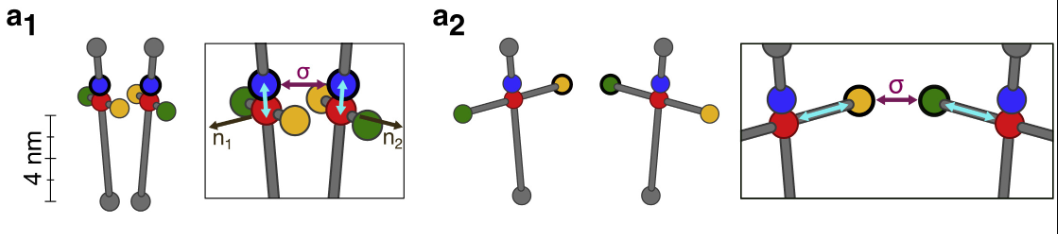


a1: gag-gag homodimerization; a2: gag-gag heterodimerization


Matthew J. Varga, Yiben Fu, Spencer Loggia, Osman N. Yogurtcu, Margaret E. Johnson, NERDSS: A Nonequilibrium Simulator for Multibody Self-Assembly at the Cellular Scale, Biophysical Journal, Volume 118, Issue 12, 2020, Pages 3026-3040, ISSN 0006-3495, https://doi.org/10.1016/j.bpj.2020.05.002.


gagsphere:


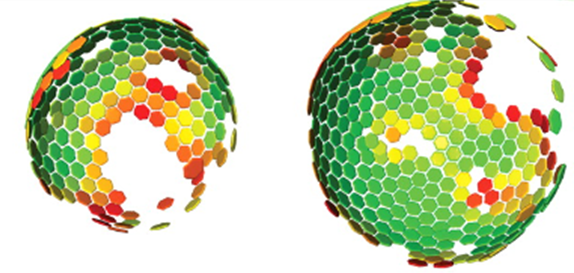


Briggs, J. A., J. D. Riches, ., H. G. Kr€ausslich. 2009. Structure and assembly of immature HIV. Proc. Natl. Acad. Sci. USA. 106:11090–11095

## 1. ioNERDSS Library Installation

The ioNERDSS library in uploaded onto the official Python Package Index (https://pypi.org/project/ioNERDSS/), where all information about this package can be found.

Run the following code in command line to install ioNERDSS from PyPi library:

In [1]:
!pip install ioNERDSS

To upgrade ioNERDSS, run the following code in command line:

In [2]:
!pip install --upgrade ioNERDSS

  Using cached ioNERDSS-1.0.23.tar.gz (127 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ionerdss to determine which version is compatible with other requirements. This could take a while.


## 2.Generating NERDSS input files using ioNERDSS

Ready-to-go .mol and .inp files for this simulation are provided in the tutorial folder **"/ReadyToGoInputFiles"**. This tutorial will also guide you through how to generate these files from scratch with ioNERDSS.

### 2.1 .mol file


The .mol files keep track the parameters of each kind of molecule involved in the simulation. For more information, please refer to the NERDSS user guide in the NERDSS github repository. (https://github.com/mjohn218/NERDSS)

#### 2.1.1 gag

Each gag monomer has five sites: 1 homodimerizing site, 1 RNA-binding site, 1 membrane-binding site, and 2 heterodimerizing site. The coordinates of these sites relative to its center of mass are (unit = nm):
- homo    0.0000    0.5000    0.0000
- mem     0.0000    2.0000    0.0000
- rna     0.0000   -4.0000    0.0000
- het1   -2.0000    0.0000    0.0000
- het2    2.0000    0.0000    0.0000

Note: The simulation described in this tutorial will only consider the self-assembly gag monomers in absence of RNA and membrane lipids. Therefore, reactions involving the membrane-binding site and the RNA-binding sites will be omitted.

The translational diffusion constants and rotational diffusion constants of clathrin we will use are Dt = [10, 10, 10] (unit = um2/s), Dr = [0.01, 0.01, 0.01] (unit = rad2/us).

To incorporate this molecule in the simulation, let's generate a .mol file using the gui.

In [1]:
# Note: Please only run this cell if you are using VSCode Jupyter Notebook extension.
# The gui will not work if being run in a web browser Jupyter Notebook viewer. In this case. instead of running this cell
# directly, please copy and paste the contents in this cell into a .py file and run it there.

# If this cell is run in a web browser Jupyter Notebook viewer, the gui will likely not shown properly
# and later codes will be blocked from being processed. In that case, restart kernal.
import ioNERDSS as io
io.gui()

Run the code above to bring up the gui, go the the ``Molecules`` tab, fill in the information as shown in the image below, and click ``"Add Molecule"``. A ``"gag.mol"`` will be generated in the current directory


Note: Do not close the gui after finished for now as it will need the molecule information stored later.

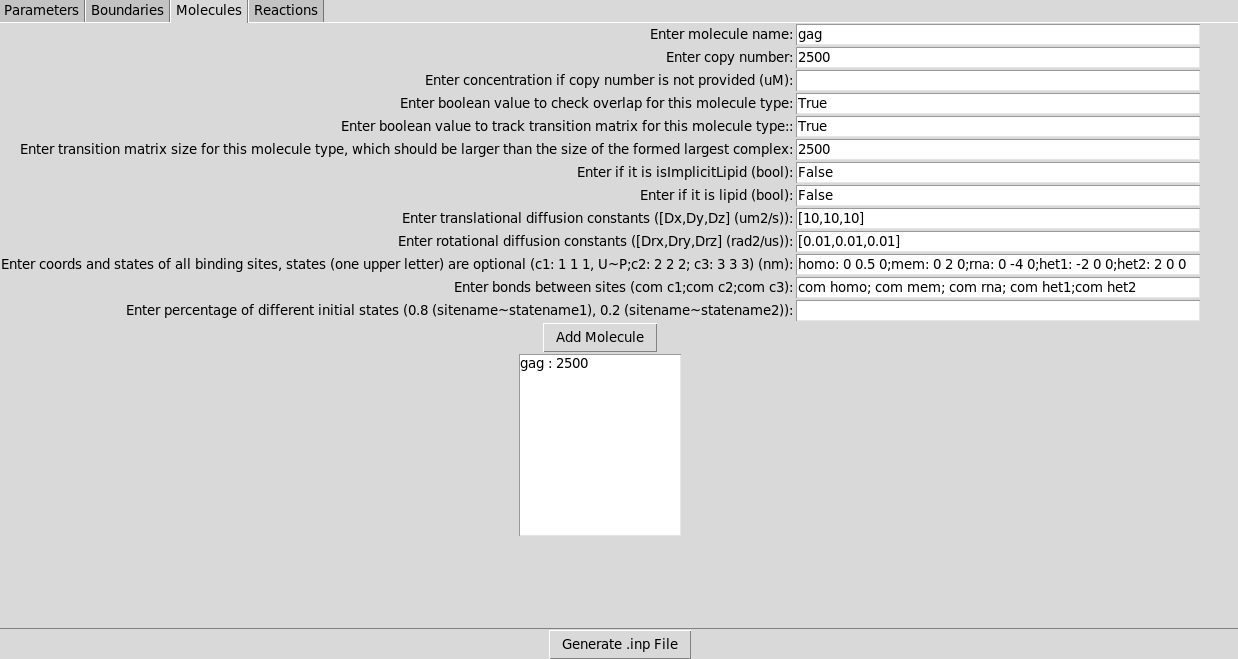

### 2.2 .inp file
The .inp file records the simulation parameters, reactions between molecules, and initial configuration of the system. For more information, please refer to the NERDSS user guide in the NERDSS github repository. (https://github.com/mjohn218/NERDSS)

#### 2.2.1 Parameters tab
Go to the ``Parameters`` tab and fill in the information as shown in the image below and **do NOT** click ``Generate .inp file`` just yet.

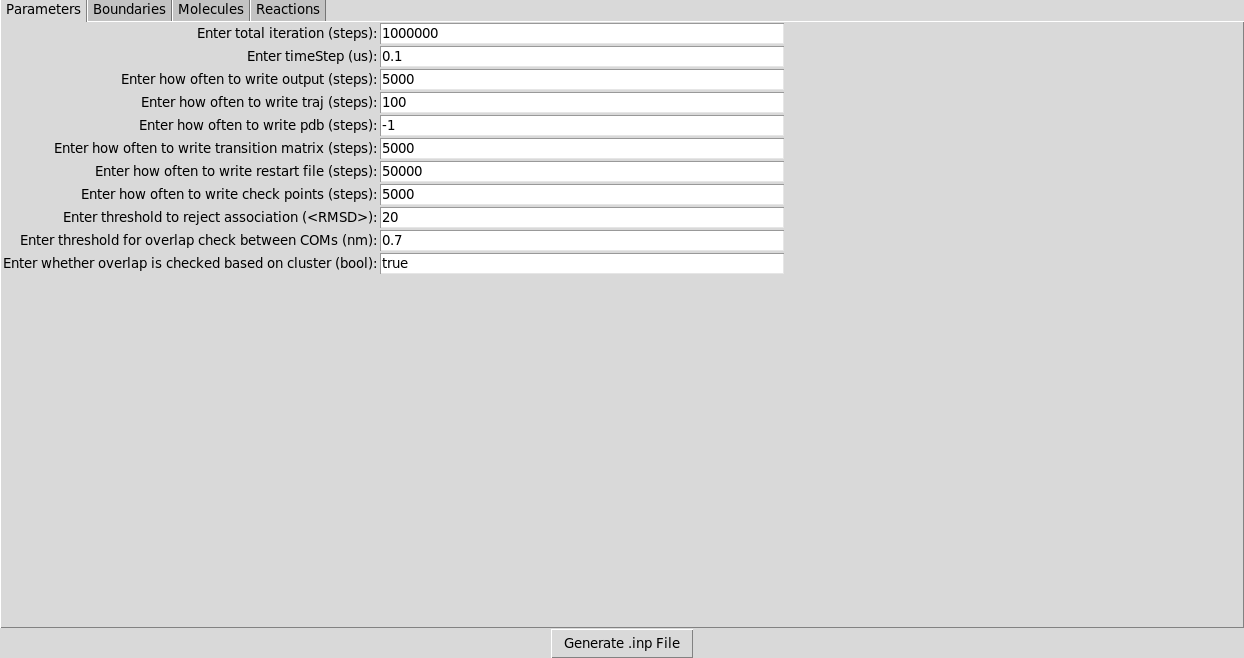

#### 2.2.2 Boundaries tab
Go to the ``Boundaries`` tab and fill in the information as shown in the image below and **do NOT** click ``Generate .inp file`` just yet.
- We will constraint this simulation to a box with dimensions 436,436,436 nm.

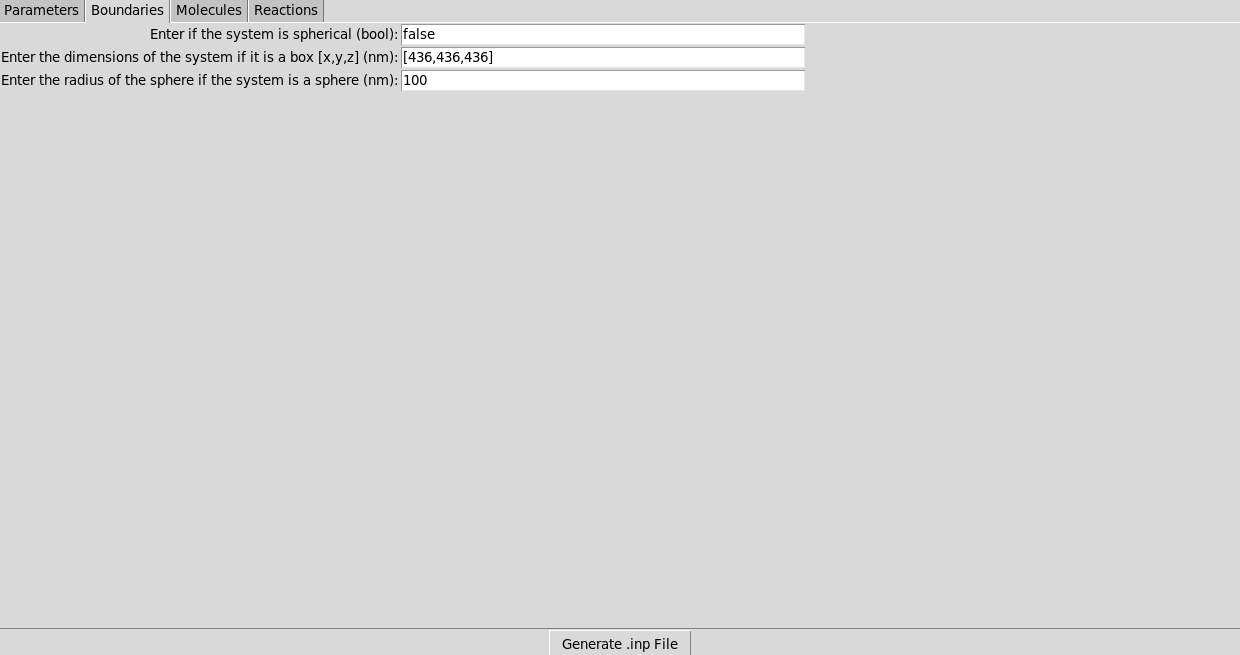

#### 2.2.3 Reactions tab
Go to the ``Reactions`` tab and specify all the possible reactions between the molecules during simulation and the reaction parameters. For this simulation, we will have the following reactions:

- gag-gag homodimerization
    - gag(homo) + gag(homo) <-> gag(homo!1).gag(homo!1)
    - onRate3DMacro      = 3.33  #units of /uM/s
    - offRateMacro     = 1.0 #units of /s
    - sigma       = 1.0  #nm
    - norm1       = [0,0,1]
    - norm2       = [0,0,1]
    - bindRadSameCom = 1.5 #scales sigma to define distance	
    - excludeVolumeBound = true
    - loopCoopFactor = 0.001
    - assocAngles = [1.56349699, 1.56349699, 0.0, 0.0, 0.0] 

- gag-gag heterodimerization
    - gag(het2) + gag(het1) <-> gag(het2!1).gag(het1!1)
    - onRate3DMacro      = 0.5 #/uM/s
    - offRateMacro     = 5 #/s
    - sigma       = 1.0
    - norm1       = [0,0,1]
    - norm2       = [0,0,1]
    - bindRadSameCom = 1.5 #scales sigma to define distance	
    - loopCoopFactor = 0.001
    - assocAngles = [2.61799387799, 2.61799387799, -3.075896854, 3.075896854, 0.0]

For homodimerization, fill in the following and click ``Add Reaction``:

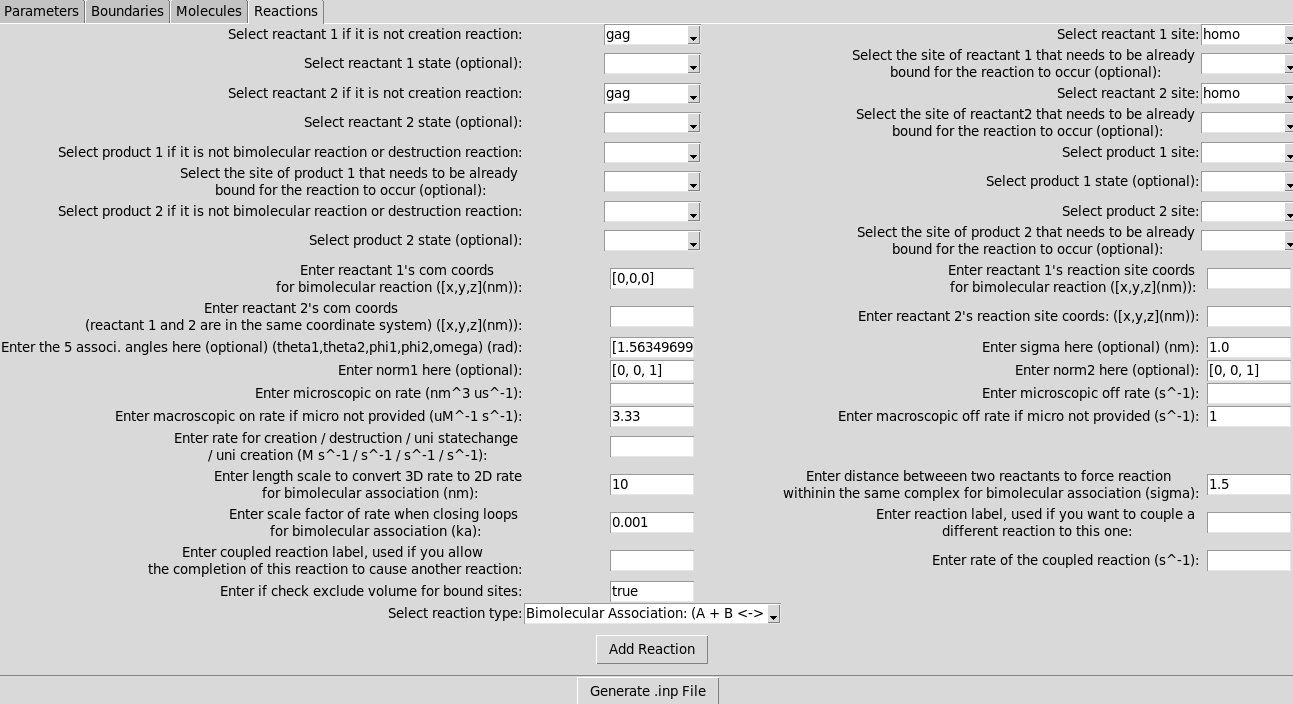

For heterodimerization, For homodimerization, fill in the following and click ``Add Reaction``:

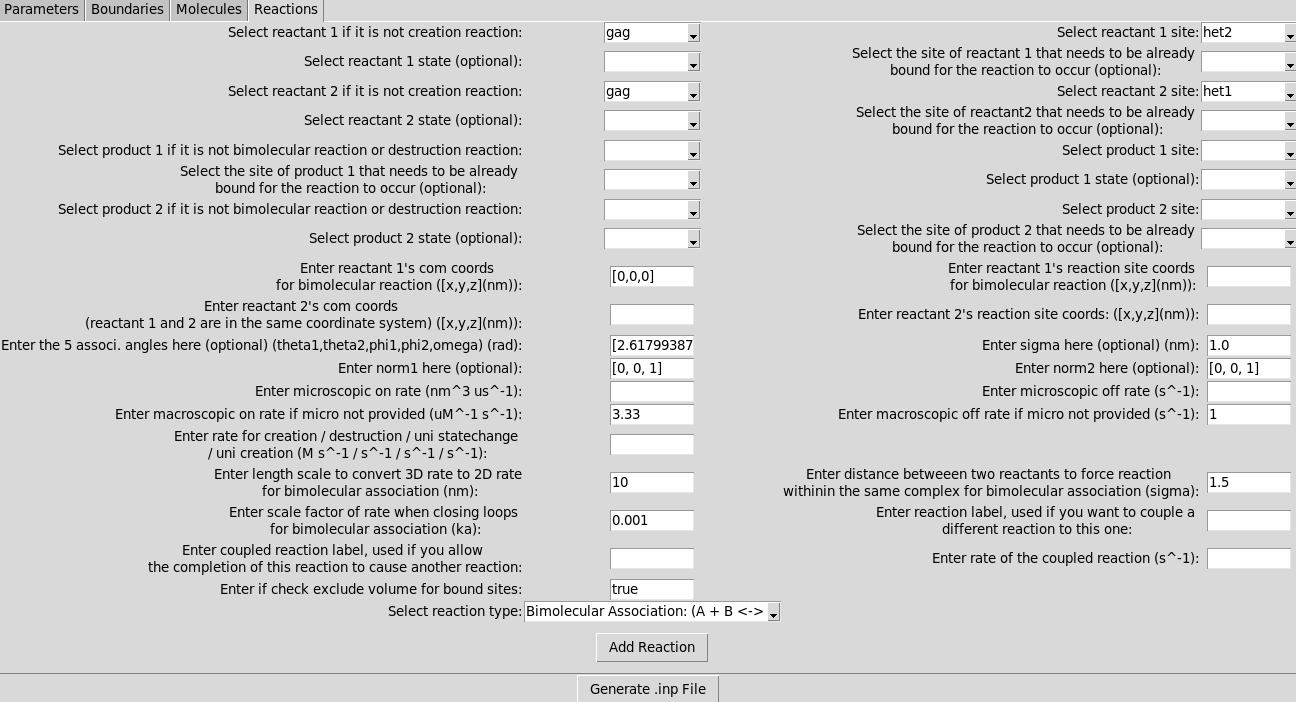

Click ``Generate .inp File``, and a `"parms.inp"` should be generated in the current directory.

## 3. Running simulation

Clone NERDSS repository from Github (https://github.com/mjohn218/NERDSS). Refer to the user guide and install NERDSS on local device. After installation NERDSS, a executable file named 'nerdss.exe' will be found.

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below in system command line to start simulation:

> ./nerdss -f parms.inp

When the simulation concludes, several NERDSS outpus files and directories will be generated in the current directoy. These include:
- observables_time.dat
- copy_numbers_time.dat
- histogram_complexes_time.dat
- mono_dimer_time.dat
- bound_pair_time.dat
- transition_matrix_time.dat
- restart.dat
- /RESTARTS
- /PDB
- initial_crds.xyz
- final_coords.xyz
- trajectory.xyz
- system.psf

Some of these files may not be generated based on different input parameters. For more information on these output files, please refer to the NERDSS user guide found in the NERDSS github repository.


## 4. Analyzing Output Files

ioNERDSS includes a variety of functions to analyze and visualize the simulation results. The codes below will show some of them. For single species simulations, the tutorial on all of them can be found in `SingleSpeciesTutorial`, which is also in the ioNERDSS github repository. A more detailed description on the functions and all of there parameters can be found in the `ioNERDSS User Guide` in the ioNERDSS github repository.

In [4]:
import ioNERDSS as io
# Create a single histogram object
single_hist = io.SingleHistogram(FileName = "ReadyToGoOutputFiles/histogram_complexes_time.dat", FileNum = 1, InitialTime = 0.0, FinalTime = 0.02, SpeciesName = 'gag') 

### 4.1 General Histogram

This function creates histogram of the average number of each type/size of complex species 


For more information, read ``2.2.1 HISTOGRAM – average number of each complex species size`` in the User Guide.

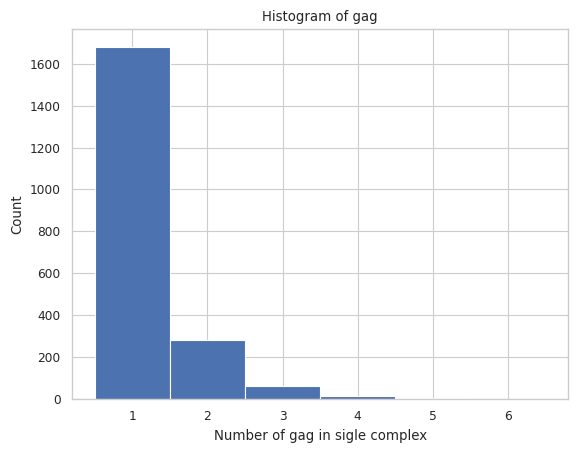

In [5]:
result = single_hist.hist_complex_count()

### 4.2 Maximum Monomers in Single Complex vs. Time

This function creates a plot indicating maximum number of monomers in single complex molecule during a certain time period.


For more information, read ``2.1.5 LINE GRAPH – max count of protein species in a single complex at a time`` in the User Guide.

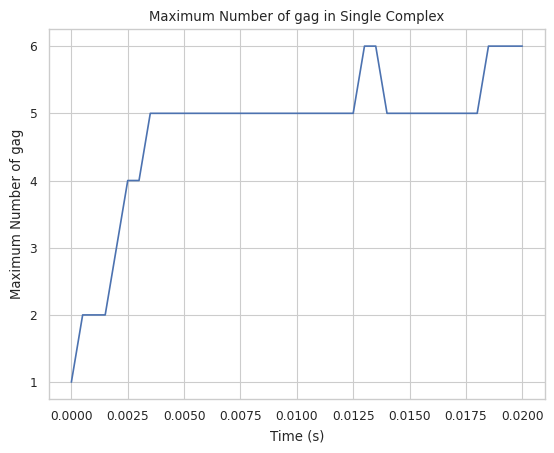

In [6]:
result = single_hist.line_max_complex_size()

### 4.3 General Histogram Progression vs. Time

This function enables users to generate 2D histogram of numerical distribution of different N-mers vs. time. The x-axis is the distribution of number of monomers in single complex and y-axis is the time period. The color in each box indicates the number of corresponding N-mers when corresponding time period is reached.

Important Parameters:
- TimeBins: It is the number of bins that users want to divide the selected time period into. The value should be a positive integer. 
- xBarSize (Int, Optional = 1): It is the size of each data bar in x-dimension. The x-axis will be separated evenly according to this number and the count of each size range will be summed up and shown together.
- ShowMean (Bool, Optional = False): Whether the corresponding mean value will be shown in the center of each box 
- ShowStd (Bool, Optional = False): Whether the corresponding standard deviation value will be shown in the center of each box 


For more information, read ``2.2.3 HEATMAP – average number of complexes at each time interval`` in the User Guide.

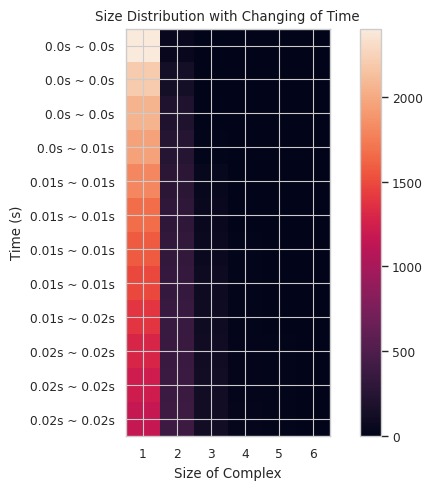

In [10]:
result = single_hist.heatmap_complex_count(TimeBins = 12)

### 4.4 sphere_regularization_index

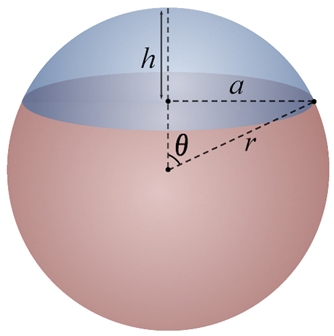

In the sphere assembled by gag proteins, each gag monomer can be viewed as a sphere cap contributing a portion of the sphere. Ideally, the gag monomers would self-organize themselves exactly on the surface of the ideal sphere and become “spherical caps” that perfectly comprise of the sphere. However, this assembly may not be perfect in reality. The theta of each gag sphere cap can be either greater than or less than the ideal theta of the sphere. In this case, the sphere regularization index is calculated as the ratio of gag monomers that have their theta less than or equal to the ideal theta in an assembled complex.


This function calculated the regularization index of the complexes formed in the simulation.


For more information, read ``2.8.2 Sphere Regularization Index`` in the User Guide.

In [1]:
import ioNERDSS as io

# Calculate the regularization index of the first 3 largest complexes formed at iteration 200000
io.sphere_regularization_index(PathName = "ReadyToGoOutputFiles", IterNum = 200000, TimeStep = 0.1, ComplexNum = 3, SpeciesName = "gag")

The total number of complexes is 1715
Complex Size: 6.000000 
Theta of the sphere cap: 0.928128 
R of the fitted circle: 4.500332 
Sphere center coord:  [360.08775134 334.06316664 324.12423557]
Sphere cap COM:  [360.151, 334.6261666666666, 324.179]
Regularixation index:  0.0
------------------------------------------------------------------------------
The total number of complexes is 1715
Complex Size: 6.000000 
Theta of the sphere cap: 0.577679 
R of the fitted circle: 7.071632 
Sphere center coord:  [232.64189749  25.71270212 430.04258583]
Sphere cap COM:  [231.44450000000003, 20.3605, 430.05566666666664]
Regularixation index:  0.0
------------------------------------------------------------------------------
The total number of complexes is 1715
Complex Size: 5.000000 
Theta of the sphere cap: 0.294724 
R of the fitted circle: 12.523278 
Sphere center coord:  [227.15198911  48.0934493   53.14100001]
Sphere cap COM:  [220.01, 39.382999999999996, 49.8514]
Regularixation index:  0.2
-

([6, 6, 5],
 [0.9281276152423736, 0.5776793892583632, 0.2947238103467156],
 [4.50033236241453, 7.071632070949526, 12.523277826527606],
 [array([360.08775134, 334.06316664, 324.12423557]),
  array([232.64189749,  25.71270212, 430.04258583]),
  array([227.15198911,  48.0934493 ,  53.14100001])],
 [[360.151, 334.6261666666666, 324.179],
  [231.44450000000003, 20.3605, 430.05566666666664],
  [220.01, 39.382999999999996, 49.8514]],
 [0.0, 0.0, 0.2])